# **Importing librairies**

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from imblearn.over_sampling import SMOTE

# **Data Understanding**

### Dataset Description:
- **PatientID**: A unique identifier for each patient. It helps differentiate between individuals in the dataset.
- **Pregnancies**: Number of times the patient has been pregnant. It may influence the risk of diabetes in women.
- **PlasmaGlucose**: Plasma glucose concentration after a glucose tolerance test (mg/dL). Higher levels can indicate diabetes.
- **DiastolicBloodPressure**: Diastolic blood pressure (mm Hg). Measures the pressure in blood vessels between heartbeats.
- **TricepsThickness**: Skinfold thickness of the triceps (mm), often used to estimate body fat.
- **SerumInsulin**: Serum insulin level (μU/mL). High levels may indicate insulin resistance or diabetes.
- **BMI**: Body Mass Index (kg/m²), calculated as weight divided by the square of height. It is a measure of body fat.
- **DiabetesPedigree**: A score indicating the likelihood of diabetes based on family history. Higher values suggest a stronger genetic predisposition.
- **Age**: Age of the patient (years).
- **Diabetic**: Target variable (0 = Non-diabetic, 1 = Diabetic). Indicates whether the patient is diagnosed with diabetes.


In [74]:
# Load the dataset
data = pd.read_csv("data/TAIPEI_diabetes.csv",sep=",",index_col="PatientID")

# Display the first few rows
data.head(10)

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,,,,,,,,,
1354778,0,171,80,34,23,43.509726,1.213191,21,0
1147438,8,92,93,47,36,21.240576,0.158365,23,0
1640031,7,115,47,52,35,41.511523,0.079019,23,0
1883350,9,103,78,25,304,29.582192,1.282870,43,1
1424119,1,85,59,27,35,42.604536,0.549542,22,0
1619297,0,82,92,9,253,19.724160,0.103424,26,0
1660149,0,133,47,19,227,21.941357,0.174160,21,0
1458769,0,67,87,43,36,18.277723,0.236165,26,0
1201647,8,80,95,33,24,26.624929,0.443947,53,1


In [75]:
# Determine how many instances of each class (0 and 1) are in the 'Diabetic' column
class_counts = data['Diabetic'].value_counts()

# Print the class distribution
print("\nClass distribution in the 'Diabetic' column:")
print(class_counts)


Class distribution in the 'Diabetic' column:
Diabetic
0    10000
1     5000
Name: count, dtype: int64


In [76]:
data.shape

(15000, 9)

### Statistical summary

In [77]:
data.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


### Correlation

<Axes: >

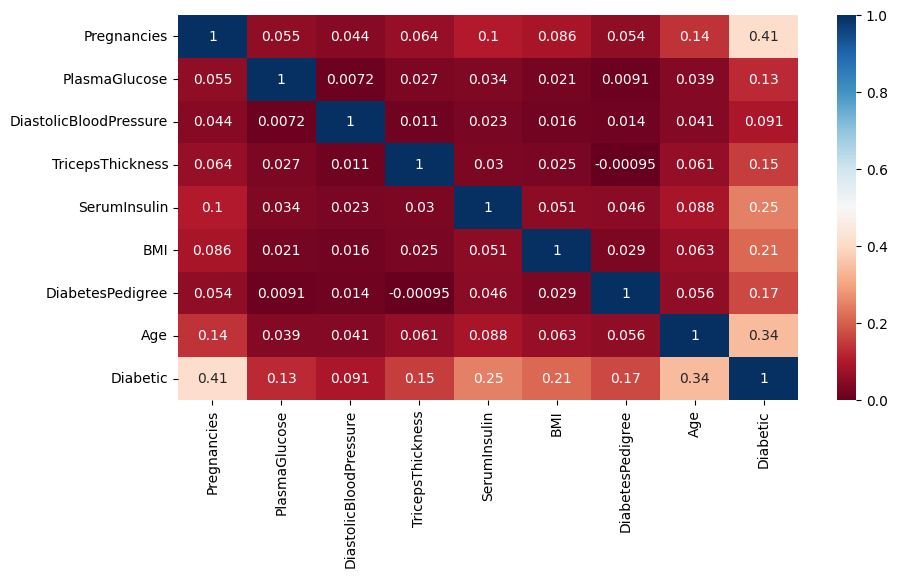

In [78]:
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="RdBu",annot=True)

### Inconsistencies detecting

In [79]:
import pandas as pd
import numpy as np

def find_dynamic_inconsistencies(data):
    inconsistent_conditions = []

    # IQR for outlier detection in each column
    for column in ['Age', 'Pregnancies', 'BMI', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin']:
        if column in data.columns:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            condition = (data[column] < lower_bound) | (data[column] > upper_bound)
            inconsistent_conditions.append(condition)
            print(f"{column}: Outliers identified as below {lower_bound:.2f} or above {upper_bound:.2f}")

# Having 14 pregnancies is rare, especially for younger individuals. For a 20-year- woman, 
# this is biologically improbable due to the time constraints (each pregnancy lasting about 9 months) 
# and the physical toll of multiple pregnancies.
    # if 'Age' in data.columns and 'Pregnancies' in data.columns:
    #     condition = (data['Age'] < 15) & (data['Pregnancies'] > data['Pregnancies'].quantile(0.90))
    #     inconsistent_conditions.append(condition)
    #     print("Rule 1: Unusually high pregnancies detected for Age < 15.")

# LOGICAL ERROR : under 20?
    # if 'Age' in data.columns and 'Pregnancies' in data.columns:
    #     condition = (data['Age'] > 20) & (data['Pregnancies'] > 4)
    #     inconsistent_conditions.append(condition)
    #     print("Rule 2: Unusually high pregnancies detected for Age under 20.")

    if 'Age' in data.columns and 'Pregnancies' in data.columns:
        condition = (data['Age'] <= 25) & (data['Pregnancies'] > 5)
        inconsistent_conditions.append(condition)
        print("Rule 1-2: Unusually high pregnancies (>5) detected for Age ≤ 25.")

# BMI values between 18.5–24.9 are considered  normal, 
# while values above 30 indicate obesity. 
# Values >50 represent severe or morbid obesity but possible 
# Dzhambulat Khatokhov (Russia): At 4 years old, he weighed 48 kg, 
# and by 9 years old, he was around 146 kg, with a BMI likely exceeding 60. source : Guinness World Records in 2023
    if 'Age' in data.columns and 'BMI' in data.columns:
        condition = (data['Age'] < 10) & (data['BMI'] > 60)
        inconsistent_conditions.append(condition)
        print("Rule 3: Unusually high BMI detected for Age < 60 or this children reach a new Guinness World Record.")

# Plasma glucose levels are measured after 2 hours of an oral glucose tolerance test (OGTT). 
# normal levels are <140 mg/dL. Levels above 200 mg/dL typically indicate diabetes.
# Why It's Unusual:
# - While a value of 192 mg/dL is high, it falls within plausible ranges for individuals 
#   with diabetes or impaired glucose tolerance.
# - This is not necessarily an error, but high values (close to 200) 
#   should be verified to ensure correct measurement.
    if 'PlasmaGlucose' in data.columns and 'SerumInsulin' in data.columns:
        condition = (data['PlasmaGlucose'] > 200) & (data['SerumInsulin'] < 10)
        inconsistent_conditions.append(condition)
        print("Rule 4: PlasmaGlucose > 200 with low SerumInsulin detected.")

# Normal diastolic blood pressure ranges between 60–80 mmHg. Values below 40 mmHg are physiologically implausible in healthy individuals.
# Why It's Unusual:
# A diastolic blood pressure of 24 mmHg indicates extreme hypotension, often associated with life-threatening conditions like:
# - Cardiovascular shock.
# - Severe blood loss or dehydration.
# In a dataset focused on diabetes prediction, this value is most likely an error rather than a valid measurement.
# not sure about the 120 value
    if 'DiastolicBloodPressure' in data.columns:
        condition = (data['DiastolicBloodPressure'] < 40) | (data['DiastolicBloodPressure'] > 120) 
        inconsistent_conditions.append(condition)
        print("Rule 5: DiastolicBloodPressure detected outside normal range (40-120).")


# Normal fasting serum insulin levels are typically between 16–166 μU/mL. Even after glucose intake, levels rarely exceed 300–400 μU/mL in most populations.
# Why It's Unusual:
# - 799 μU/mL is extremely high and suggests:
# - Severe insulin resistance or a rare metabolic condition like insulinoma (insulin-producing tumor).
# Likely causes:
# - A true outlier reflecting a unique physiological state.
# - Data-entry or measurement error.
    if 'SerumInsulin' in data.columns:
        condition = (data['SerumInsulin'] < 1) | (data['SerumInsulin'] > 700)
        inconsistent_conditions.append(condition)
        print("Rule 6: SerumInsulin value detected outside realistic bounds (1-700) or severe insulin resistance or a rare metabolic condition like insulinoma (insulin-producing tumor).")

    # Combine all conditions
    combined_condition = inconsistent_conditions[0]
    for condition in inconsistent_conditions[1:]:
        combined_condition |= condition

    # Identify inconsistent rows
    inconsistent_rows = data[combined_condition]
    return inconsistent_rows

# Apply the dynamic detection
dynamic_inconsistent_rows = find_dynamic_inconsistencies(data)

print("\nDynamic inconsistencies identified:")
print(dynamic_inconsistent_rows)

# Remove inconsistent rows
data = data.drop(dynamic_inconsistent_rows.index)

print(f"\nNumber of inconsistent rows removed: {len(dynamic_inconsistent_rows)}")
print("\nCleaned dataset:")
print(data)


Age: Outliers identified as below 2.50 or above 54.50
Pregnancies: Outliers identified as below -9.00 or above 15.00
BMI: Outliers identified as below -5.74 or above 66.26
PlasmaGlucose: Outliers identified as below 16.50 or above 196.50
DiastolicBloodPressure: Outliers identified as below 17.50 or above 125.50
TricepsThickness: Outliers identified as below -24.00 or above 80.00
SerumInsulin: Outliers identified as below -195.00 or above 429.00
Rule 1-2: Unusually high pregnancies (>5) detected for Age ≤ 25.
Rule 3: Unusually high BMI detected for Age < 60 or this children reach a new Guinness World Record.
Rule 4: PlasmaGlucose > 200 with low SerumInsulin detected.
Rule 5: DiastolicBloodPressure detected outside normal range (40-120).
Rule 6: SerumInsulin value detected outside realistic bounds (1-700) or severe insulin resistance or a rare metabolic condition like insulinoma (insulin-producing tumor).

Dynamic inconsistencies identified:
           Pregnancies  PlasmaGlucose  Diastol

In [80]:
data.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,10833.000000,10833.000000,10833.000000,10833.000000,10833.000000,10833.000000,10833.000000,10833.000000,10833.000000
mean,2.128773,107.393335,71.611373,28.536140,116.939998,31.339773,0.398265,28.955229,0.293917
std,2.739950,32.046995,16.307366,14.319582,96.433393,9.850240,0.376246,9.364822,0.455575
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,83.000000,58.000000,15.000000,37.000000,21.128730,0.138663,22.000000,0.000000
50%,1.000000,104.000000,73.000000,30.000000,77.000000,31.633447,0.202006,24.000000,0.000000
75%,3.000000,129.000000,85.000000,41.000000,182.000000,39.229027,0.612945,34.000000,1.000000
max,14.000000,192.000000,117.000000,75.000000,429.000000,56.034628,2.301594,54.000000,1.000000


# **Data Cleaning**

1. **Load and Inspect the Data**

In [81]:
# Check for basic info
data.info()

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


<class 'pandas.core.frame.DataFrame'>
Index: 10833 entries, 1354778 to 1099353
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pregnancies             10833 non-null  int64  
 1   PlasmaGlucose           10833 non-null  int64  
 2   DiastolicBloodPressure  10833 non-null  int64  
 3   TricepsThickness        10833 non-null  int64  
 4   SerumInsulin            10833 non-null  int64  
 5   BMI                     10833 non-null  float64
 6   DiabetesPedigree        10833 non-null  float64
 7   Age                     10833 non-null  int64  
 8   Diabetic                10833 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 846.3 KB

Missing Values:
 Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic    

2. **Detect Outliers**

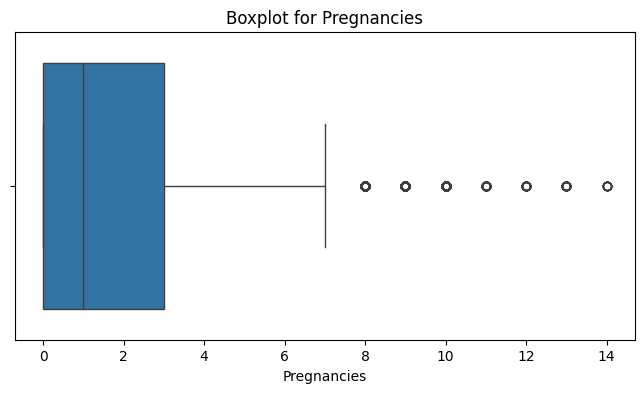

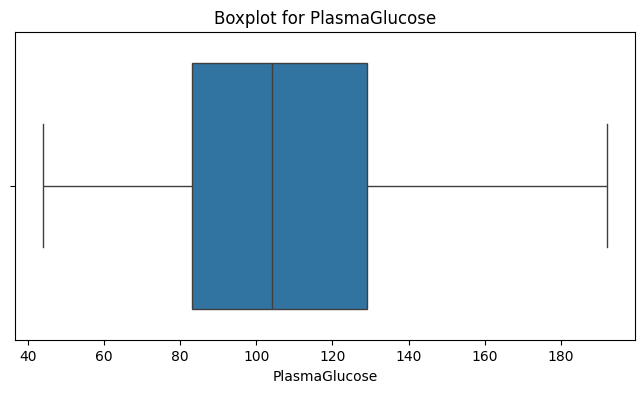

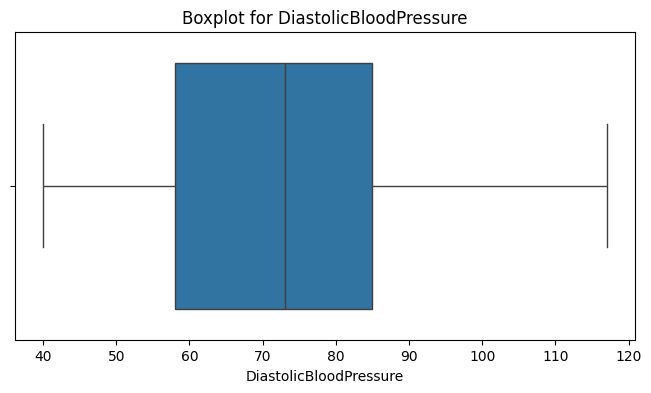

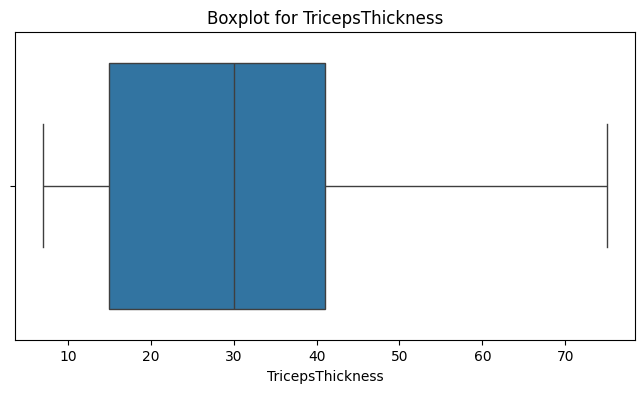

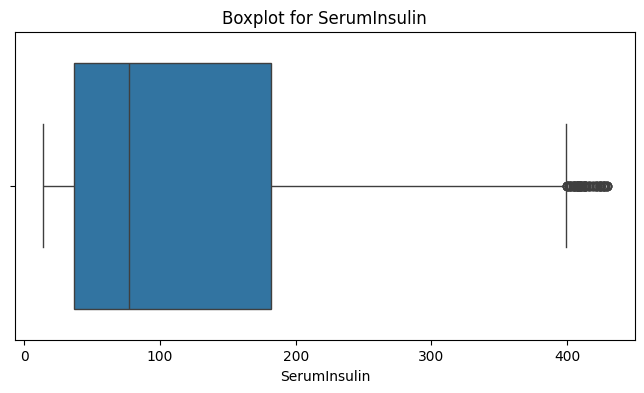

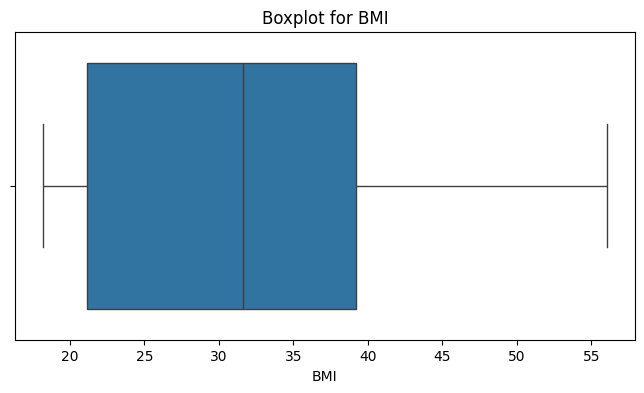

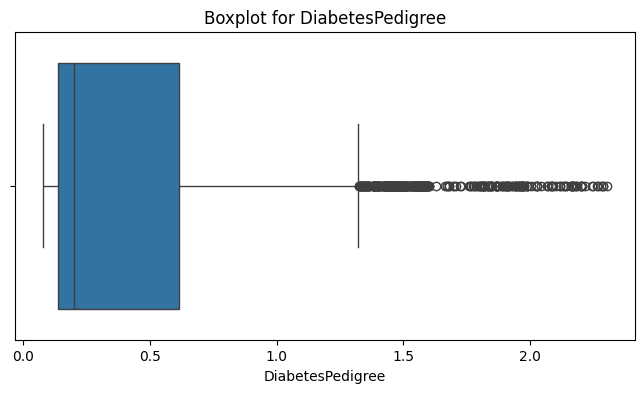

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for numerical columns
numeric_cols = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [83]:
from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = data[numeric_cols].apply(zscore)

# Identify rows where z-score > 3 or < -3
outliers = (z_scores.abs() > 3).any(axis=1)

# Show rows with outliers
print("\nOutliers:\n", data[outliers])



Outliers:
            Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
PatientID                                                       
1398321              3            163                      87   
1140806              3            123                      61   
1107050              2            114                      66   
1526607             13            134                      60   
1019999              2            113                      47   
...                ...            ...                     ...   
1100363              1            138                      79   
1174700              8            102                     100   
1345247              0             92                      44   
1901733              3            169                      68   
1331647             13             96                      66   

           TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  \
PatientID                                                      

3. **Address Outliers**


**Capping outliers refers to limiting or "clipping" the values of outliers to a certain range, usually defined by the percentile values of the data. here instead of removing outliers completely, we cap them to a threshold value**

In [84]:
# Option 1: Remove outliers
data_cleaned = data[~outliers]

# Option 2: Cap outliers at 99th percentile
for col in numeric_cols:
    upper_limit = data[col].quantile(0.92)
    lower_limit = data[col].quantile(0.08)
    data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)


4. **Verify Data Cleaning**

In [85]:
# Check for missing values again
print("\nAfter Cleaning - Missing Values:\n", data.isnull().sum())

# Check for duplicates again
print(f"\nAfter Cleaning - Duplicate rows: {data.duplicated().sum()}")

# Check statistical summary again
print("\nAfter Cleaning - Statistical Summary:\n", data.describe())



After Cleaning - Missing Values:
 Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

After Cleaning - Duplicate rows: 0

After Cleaning - Statistical Summary:
         Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
count  10833.000000   10833.000000            10833.000000      10833.000000   
mean       1.964276     107.357519               71.506969         28.159236   
std        2.315639      28.674288               15.014289         13.342184   
min        0.000000      67.000000               49.000000          9.000000   
25%        0.000000      83.000000               58.000000         15.000000   
50%        1.000000     104.000000               73.000000         30.000000   
75%        3.000000     129.000000               85.000000      

# **Feature Extraction**

In [86]:
df = data.copy()

### **Preforming SMOTE to balance both classes for our classying model**

In [87]:
# Check the class distribution
class_counts = df['Diabetic'].value_counts()
print(f"Original class distribution:\n{class_counts}\n")

Original class distribution:
Diabetic
0    7649
1    3184
Name: count, dtype: int64



In [88]:
X = df.drop(columns=['Diabetic'])
y = df['Diabetic']  # target

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target back into a balanced DataFrame
df = pd.DataFrame(X_resampled, columns=X.columns)
df['Diabetic'] = y_resampled

balanced_class_counts = pd.Series(y_resampled).value_counts()
print(f"Balanced class distribution after SMOTE:\n{balanced_class_counts}")

print("\nFirst few rows of the balanced dataset:")
print(df.head())


Balanced class distribution after SMOTE:
Diabetic
0    7649
1    7649
Name: count, dtype: int64

First few rows of the balanced dataset:
   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0            0            158                      80                34   
1            7            103                      78                25   
2            1             85                      59                27   
3            0             82                      92                 9   
4            0            133                      49                19   

   SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0            23  43.509726          0.981927   21         0  
1           269  29.582192          0.981927   43         1  
2            35  42.604536          0.549542   22         0  
3           253  19.724160          0.103424   26         0  
4           227  21.941357          0.174160   21         0  


In [89]:
df

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,158,80,34,23,43.509726,0.981927,21,0
1,7,103,78,25,269,29.582192,0.981927,43,1
2,1,85,59,27,35,42.604536,0.549542,22,0
3,0,82,92,9,253,19.724160,0.103424,26,0
4,0,133,49,19,227,21.941357,0.174160,21,0
...,...,...,...,...,...,...,...,...,...
15293,7,100,90,23,43,31.476498,0.137100,42,1
15294,7,100,86,47,90,45.411123,0.165936,46,1
15295,5,96,88,47,269,24.231430,0.266004,41,1
15296,3,107,52,29,77,37.726692,0.181917,28,1


### **Feature extraction**

In [90]:
import pandas as pd

# 1. BMI-to-Age Ratio
df['BMI_Age_Ratio'] = df['BMI'] / df['Age']

# 2. Insulin Sensitivity Index (ISI)
df['ISI'] = 10000 / (df['PlasmaGlucose'] * df['SerumInsulin'])

# 3. Blood Pressure Normalized by Age (BP-Age Ratio)
df['BP_Age_Ratio'] = df['DiastolicBloodPressure'] / df['Age']

# 4. High-Risk Pregnancy Index
df['HighRiskPregnancy'] = (df['Pregnancies'] * df['BMI']) / df['Age']

# 5. Glucose-Insulin Product
df['Glucose_Insulin'] = df['PlasmaGlucose'] * df['SerumInsulin']

# 6. Pregnancies-to-Age Ratio
df['Pregnancies_Age_Ratio'] = df['Pregnancies'] / df['Age']

# 7. Metabolic Risk Score
df['Metabolic_Risk'] = (df['BMI'] + df['PlasmaGlucose'] + df['DiastolicBloodPressure']) / 3

# 8. Pedigree-Adjusted Glucose
df['Pedigree_Glucose'] = df['PlasmaGlucose'] * df['DiabetesPedigree']

# 9. Fat Distribution Index
df['Fat_Index'] = (df['BMI'] + df['TricepsThickness']) / 2


In [91]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15298 entries, 0 to 15297
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pregnancies             15298 non-null  int64  
 1   PlasmaGlucose           15298 non-null  int64  
 2   DiastolicBloodPressure  15298 non-null  int64  
 3   TricepsThickness        15298 non-null  int64  
 4   SerumInsulin            15298 non-null  int64  
 5   BMI                     15298 non-null  float64
 6   DiabetesPedigree        15298 non-null  float64
 7   Age                     15298 non-null  int64  
 8   Diabetic                15298 non-null  int64  
 9   BMI_Age_Ratio           15298 non-null  float64
 10  ISI                     15298 non-null  float64
 11  BP_Age_Ratio            15298 non-null  float64
 12  HighRiskPregnancy       15298 non-null  float64
 13  Glucose_Insulin         15298 non-null  int64  
 14  Pregnancies_Age_Ratio   15298 non-null

In [92]:
data.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,,,,,,,,,
1354778,0,158,80,34,23,43.509726,0.981927,21,0
1883350,7,103,78,25,269,29.582192,0.981927,43,1
1424119,1,85,59,27,35,42.604536,0.549542,22,0
1619297,0,82,92,9,253,19.724160,0.103424,26,0
1660149,0,133,49,19,227,21.941357,0.174160,21,0


In [93]:
df.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,BMI_Age_Ratio,ISI,BP_Age_Ratio,HighRiskPregnancy,Glucose_Insulin,Pregnancies_Age_Ratio,Metabolic_Risk,Pedigree_Glucose,Fat_Index
0,0,158,80,34,23,43.509726,0.981927,21,0,2.071892,2.751789,3.809524,0.000000,3634,0.000000,93.836575,155.144416,38.754863
1,7,103,78,25,269,29.582192,0.981927,43,1,0.687958,0.360920,1.813953,4.815706,27707,0.162791,70.194064,101.138448,27.291096
2,1,85,59,27,35,42.604536,0.549542,22,0,1.936570,3.361345,2.681818,1.936570,2975,0.045455,62.201512,46.711059,34.802268
3,0,82,92,9,253,19.724160,0.103424,26,0,0.758622,0.482021,3.538462,0.000000,20746,0.000000,64.574720,8.480809,14.362080
4,0,133,49,19,227,21.941357,0.174160,21,0,1.044827,0.331225,2.333333,0.000000,30191,0.000000,67.980452,23.163251,20.470678


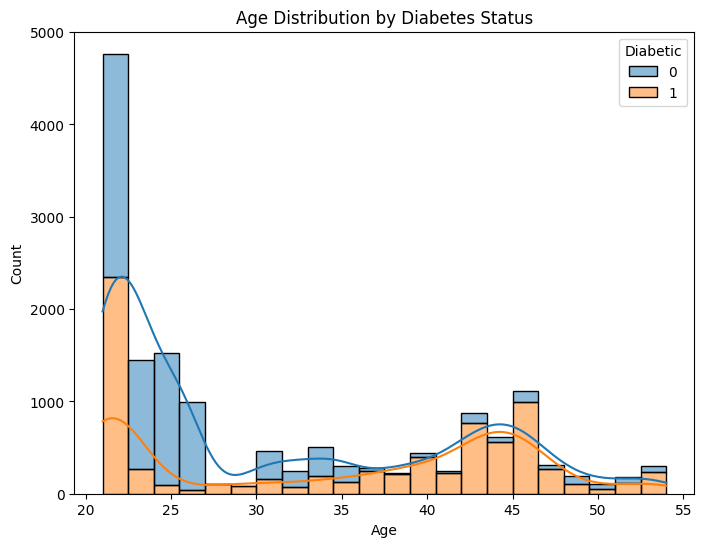

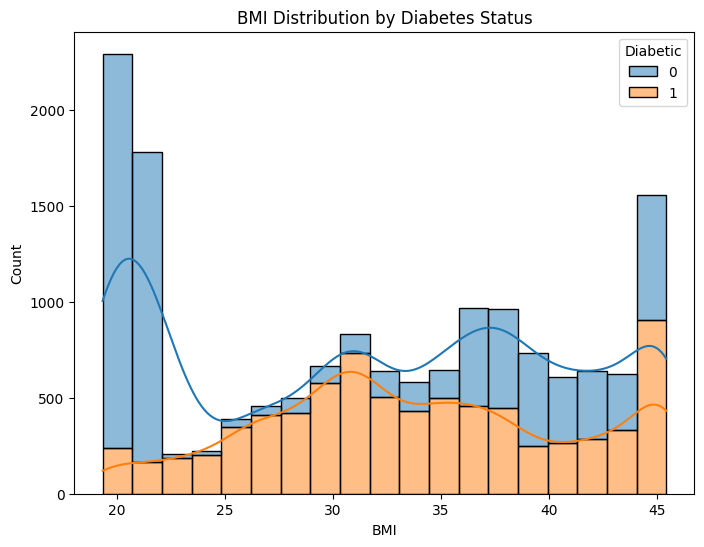

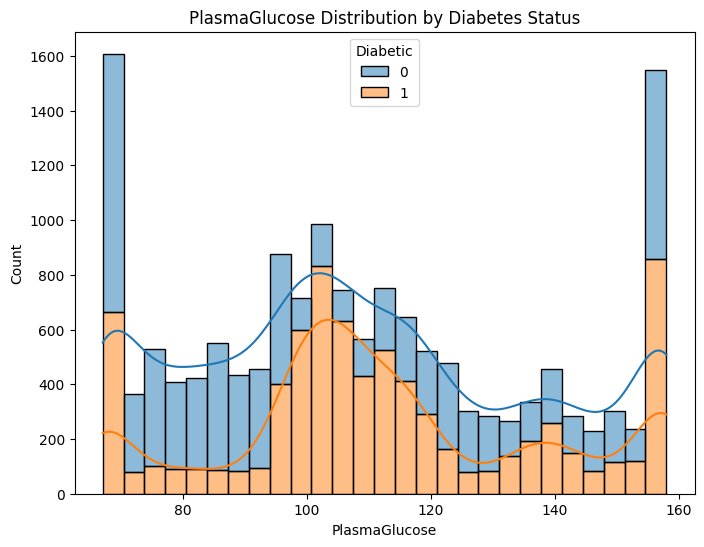

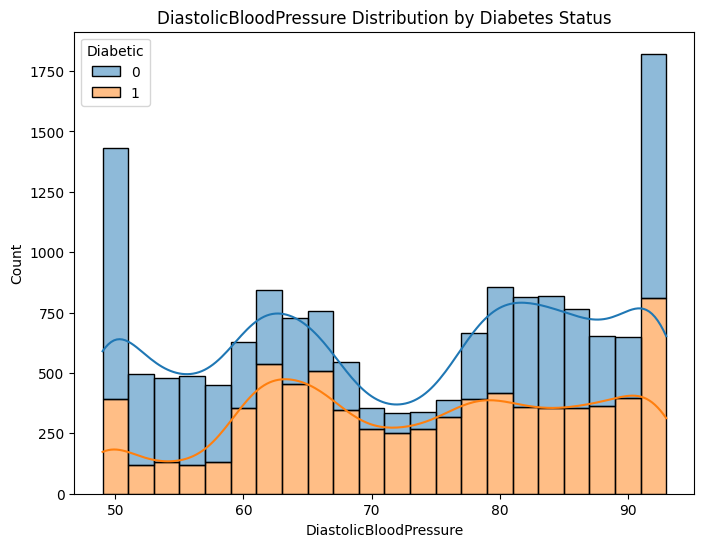

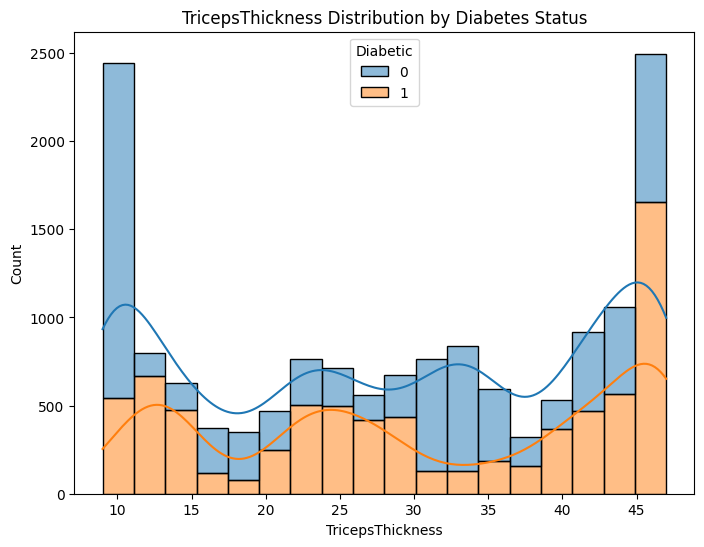

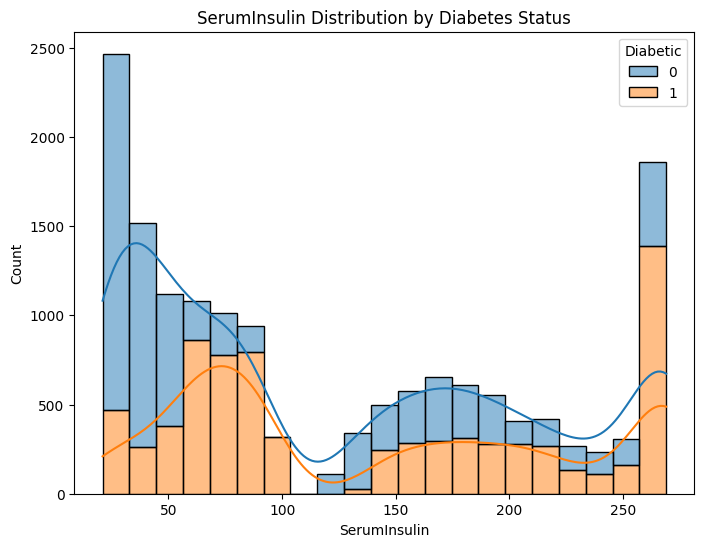

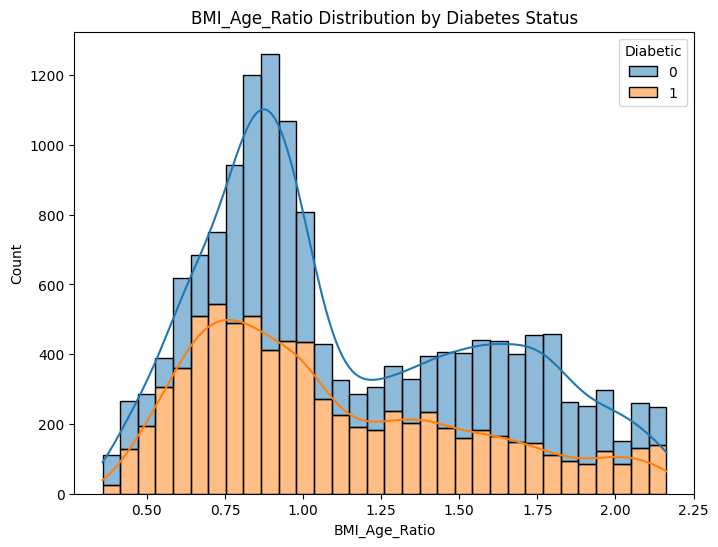

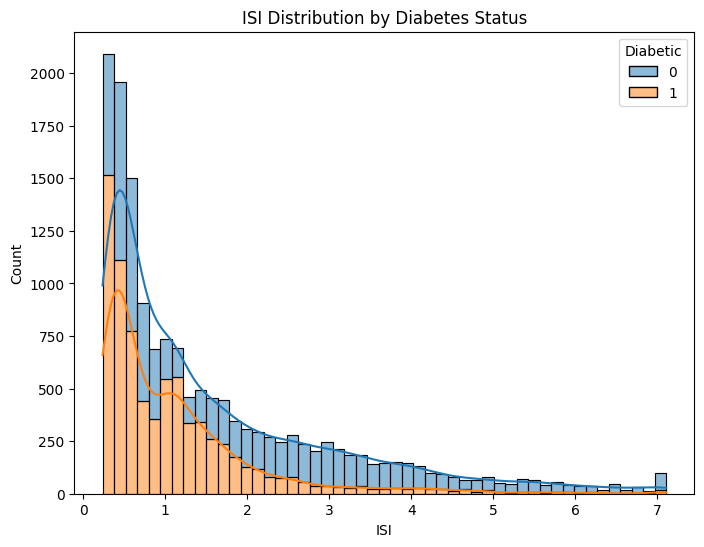

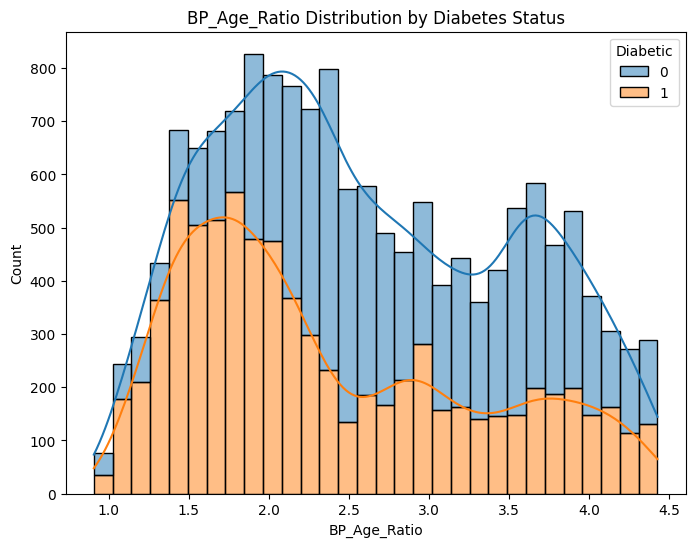

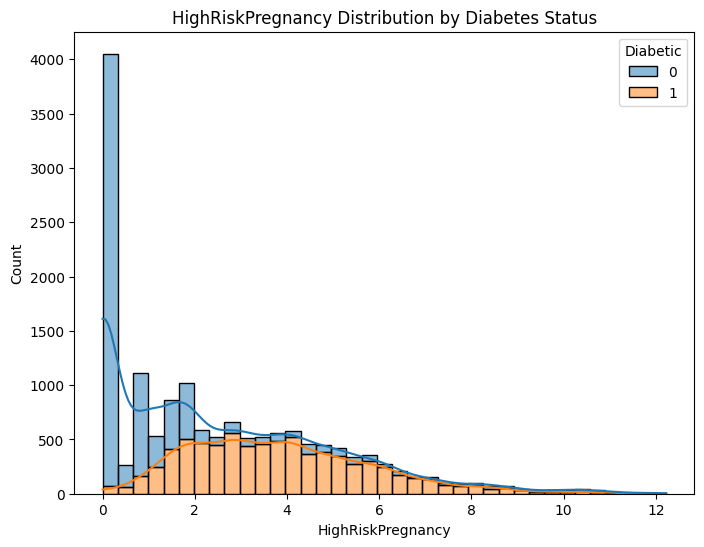

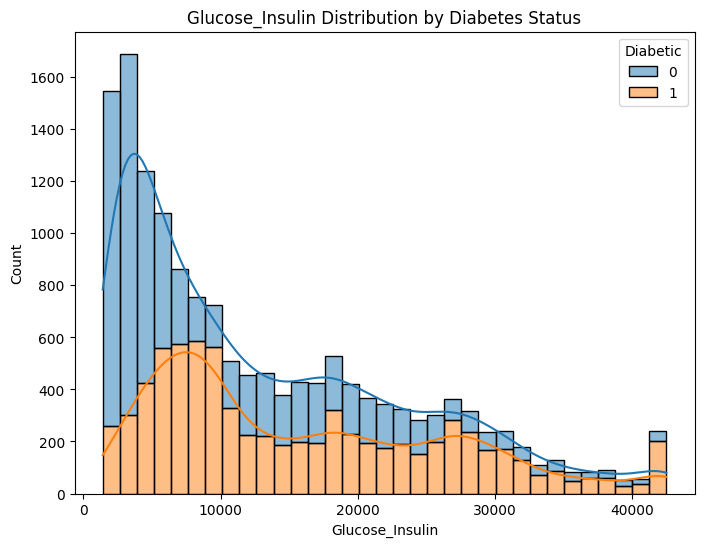

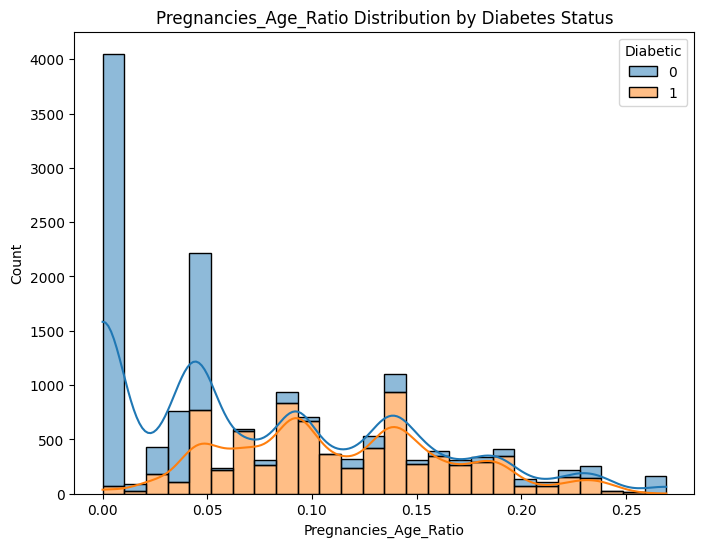

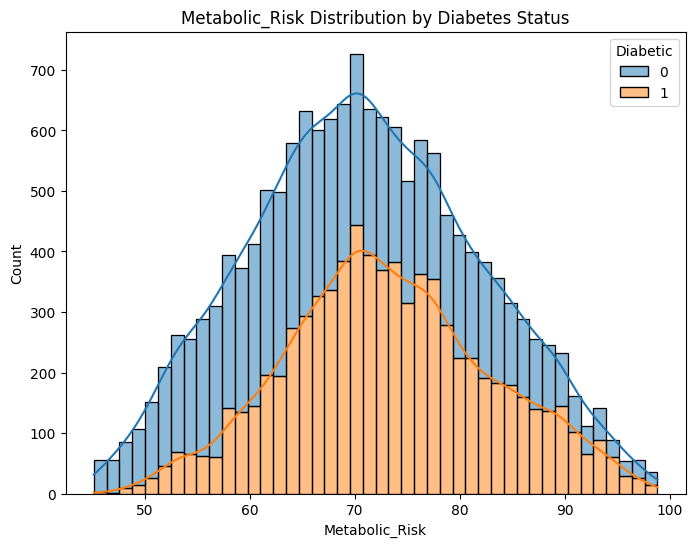

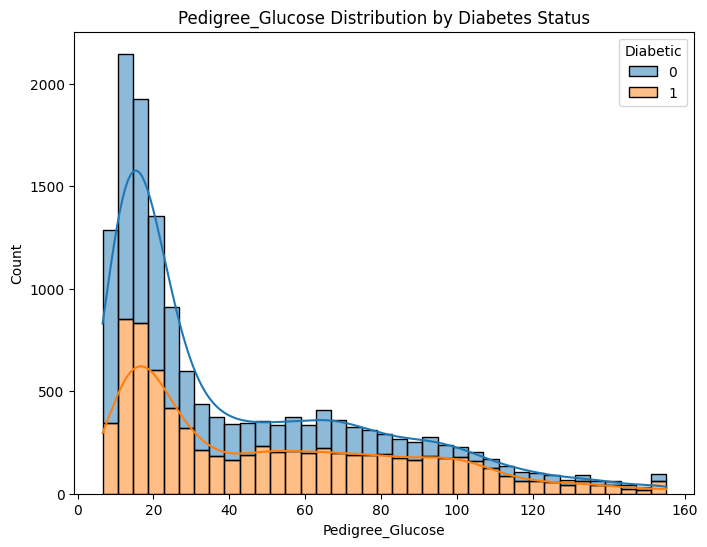

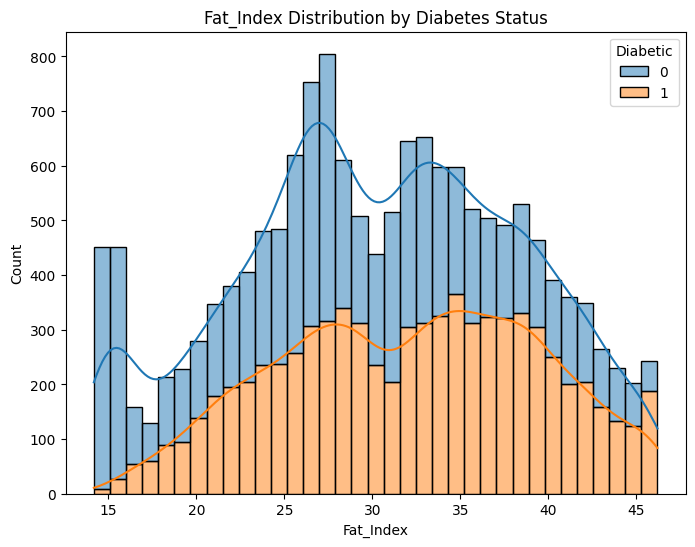

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of continuous features
continuous_features = [
    'Age', 'BMI', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness',
    'SerumInsulin', 'BMI_Age_Ratio', 'ISI', 'BP_Age_Ratio', 'HighRiskPregnancy',
    'Glucose_Insulin', 'Pregnancies_Age_Ratio', 'Metabolic_Risk', 'Pedigree_Glucose', 'Fat_Index'
]

# Plot histograms for continuous features
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='Diabetic', kde=True, multiple='stack')
    plt.title(f'{feature} Distribution by Diabetes Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


## **Correlation Heatmap**


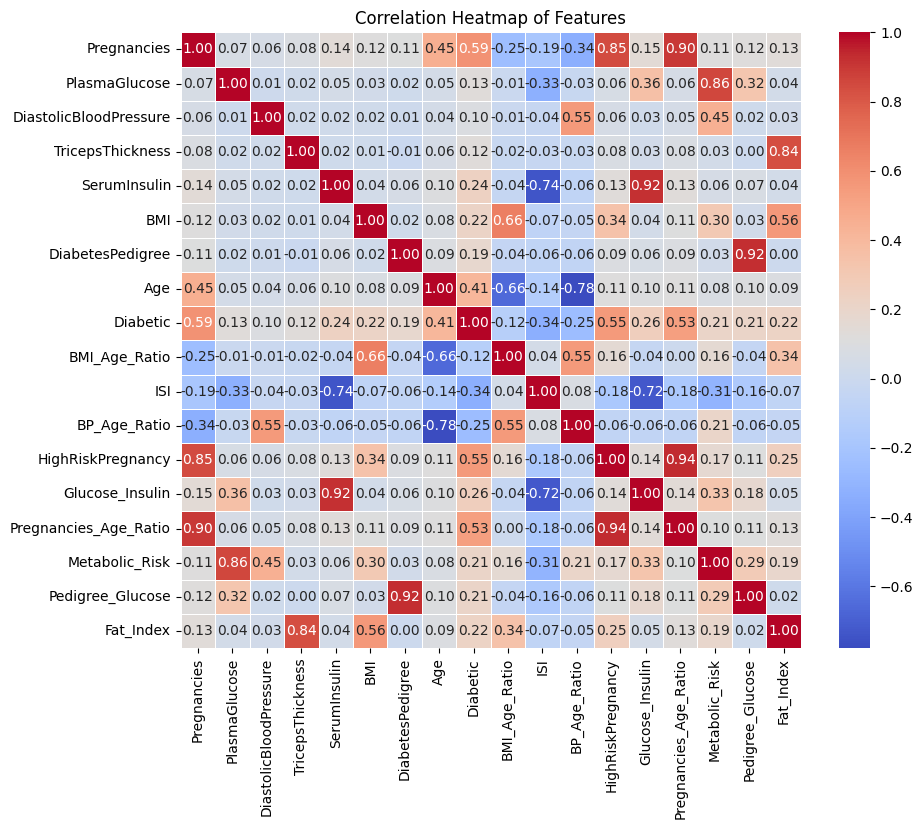

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


**Orginal data correlation matric after outliers handling**

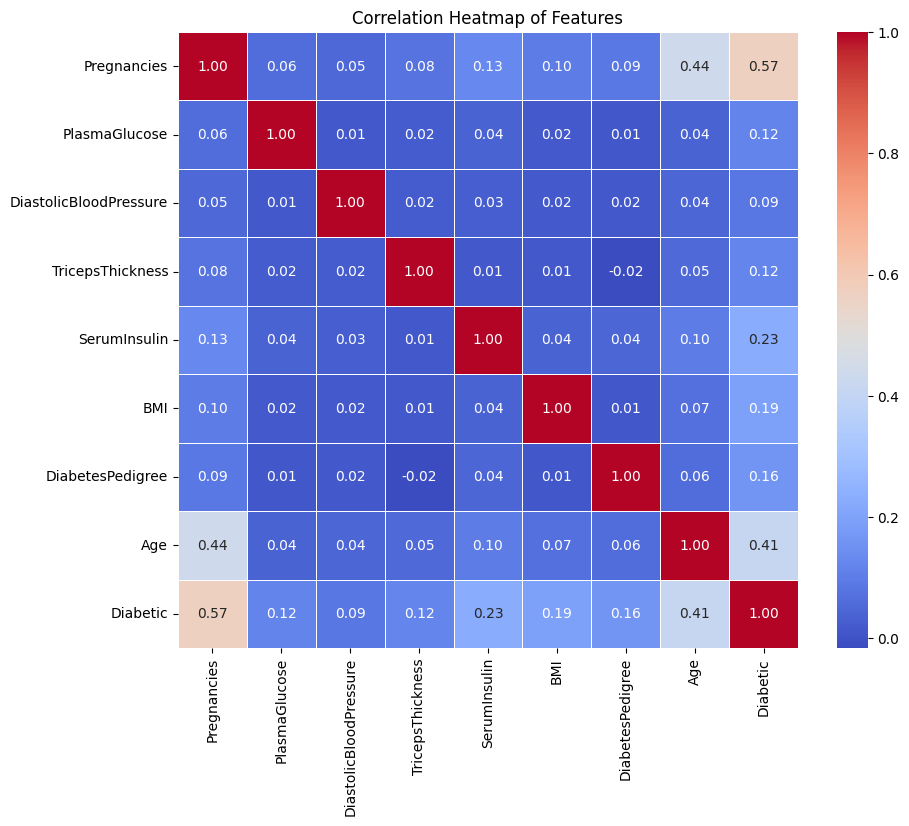

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()
